우리가 알거니와 하나님을 사랑하는 자 곧 그의 뜻대로 부르심을 입은 자들에게는 모든 것이 합력하여 선을 이루느니라 (롬8:28)
<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MLwithPython.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# 제 9-3 강: 역전파 오차 계산법

----------

## 학습 목표
- 역전파 개념의 이해 한다
- 다층 신경망에서 은닉층 오차를 계산하는 방법을 배운다.
- 은닉층 오차 계산을 단순화하고 일반화 하는 방법을 배운다.

## 학습 내용
- 출력층의 오차를 역전파하기
- 역전파로 은닉층의 오차 계산하기
- 은닉층 오차 계산의 단순화하고 일반화하기

------------

## 1. 여러 노드의 가중치 학습

페셉트론과 같은 단순 신경망을 이용한 선형 분류기에서는 예측값과 정답(클래스 레이블)과의 차이인 오차를 사용하여 학습하면서, 선형 분류자를 정교하게 조정할 수 있었습니다.  오차와 선형 분류자의 관계가 단순했기 때문에 기울기(가중치)를 조정해나가는 것이 어렵지 않았습니다.  

그런데 만약, 앞장에서 다룬 다음과 같은 신경망처럼 하나 이상의 노드가 결과를 출력하고, 따라서 하나 이상의 노드가 오차를 일으키는데 영향을 미친다면 가중치를 어떻게 조정해야 합리적일까요? 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch7/2-3-2NN.PNG?raw=true" width="400">
<center>그림 1: 신경망의 입력과 가중치</center>

## 2. 은닉층의 오차 계산
앞의 예제에서 클래스 레이블 $y_1 = 1$이고, 신경망 출력층의 결과 즉 예측값 $\hat{y}_1 = 0.58$라고 합시다. 그러면, 오차($y_1 - \hat{y}_1$)는 0.42입니다. 이 오차를 활용하여 가중치를 조정하려고 할 때, 하나의 가중치에만 적용하는 것은 합리적이 못합니다. 왜냐하면, 3개 노드가 모두 오차를 발생하도록 영향을 끼쳤다고 보는 것이 타당하기 때문입니다.  그러므로 오차 0.42도 적절히 각 노드에게 분배하여 각 가중치를 조정하는 것이 합리적일 것입니다. 

그러면, 오차 0.42를 어떻게 합리적으로 분배해야 하나요? 이것이 우리의 질문입니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch8/2-3-2NN-BackProp1.PNG?raw=true" width="500">
<center>그림 2: 신경망의 오차 역전파(1)</center>

균등하게 분배할 수도 있겠지만, 위의 예제에서 각각의 가중치 비중이 3:2:1이므로 오차도 같은 비례로 각 가중치에 나눠주는 것이 합당할 것입니다. 오차 0.42를 각각 $\frac{3}{6}:\frac{2}{6}:\frac{1}{6}$으로 배분해서 각 가중치를 조정할 때 고려하는 것입니다. 

이 방법은 노드가 더 많아질지라도 동일하게 적용할 수 있습니다. 만약 10개의 노드가 다음 층의 노드와 연결되어 있다면, 우리는 오차를 10개의 가중치에 나누어 주되, 그 값은 각각의 가중치의 크기에 따라 즉 오차에 영향을 끼친 값에 비례하여 분배하면 됩니다. 

여기서 잠깐 생각해보면, 가중치를 사용하는 데는 두 가지 다른 방법이 있다는 것을 관찰할 수 있습니다.  

- 첫째로 우리는 신경망의 입력층에서 출력층으로 신호를 전달할 때 가중치를 사용합니다. 지금까지 우리는 이렇게 순방향으로 입력신호를 전달할 때 사용하였습니다. 

- 둘째로 우리는 출력에서 다시 신경망으로 후진하여 오차를 반영하기 위해 가중치를 사용합니다. 이 방법을 역전파$^{backpropagation}$라 부르는 이유에 대해서는 별로 놀라지 않을 것입니다.

출력층에서의 오차 $E^{[2]}$는 출력층(2) 첫번째 노드이므로, 오차 $e^{[2]}_1$는 클래스 레이블$y_1$과 예측값$\hat{y}$과의 차이($e^{[2]}_1 = y_1 - \hat{y}$)입니다. 아랫첨자는 출력층의 노드가 여러 개인 것을 감안한 표기입니다.  우리가 나중에는 오차 제곱합(SSE: sum of squared error)을 사용하겠지만, 여기서는 일단 단순한 오차를 사용하기로 합시다.  그러면, 다음 그림과 같이 오차가 각 가중치의 값에 비례하여 배분을 할 수 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch8/2-3-2NN-BackProp2.PNG?raw=true" width="500">
<center>그림 3: 신경망의 오차 역전파 (2)</center>

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch8/2-3-2NN-BackProp3.PNG?raw=true" width="500">
<center>그림 4: 신경망의 오차 역전파 (3)</center>

출력층의 첫 번째 노드에서의 오차 $e^{[2]}_1$와 두 번째 노드에서의 오차$e^{[2]}_2$를 계산하여 서로 합하여 은닉층과 출력층 사이에서 발생한 오차를 계산합니다.

\begin{align}
e_1^{[2]} &= y_1 - \hat{y}_1 \\  &= 1 - 0.58 = 0.42 \\
e_2^{[2]} &= y_2 - \hat{y}_2 \\  &= 1 - 0.55 = 0.45 \\
\\
E^{]2]} &= 
  \begin{pmatrix}  0.42 \\  0.45  \end{pmatrix}
\end{align}

결론적으로 출력층의 오차$E^{[2]}$를 은닉층과 출력층 사이의 각 가중치에 대하여 배분하여 은닉층의 오차$E^{[1]}$를 구하게 되었습니다.  여기서 $w_{ij}$는 모두 $W^{[2]}$행렬의 원소들입니다. 

\begin{align}
E^{[1]} &= 
  \begin{pmatrix}     e_1^{[1]} \\ e_2^{[1]} \\ e_3^{[1]} \\ \end{pmatrix} \\ &= 
  \begin{pmatrix}
     e^{[2]}_1 \cdot \frac{w_{11}}{\sum_{i=1}^{3} w_{i1}}  + 
     e^{[2]}_2 \cdot \frac{w_{12}}{\sum_{i=1}^{3} w_{i2}}  \\
     e^{[2]}_1 \cdot \frac{w_{21}}{\sum_{i=1}^{3} w_{i1}}   + 
      e^{[2]}_2 \cdot \frac{w_{22}}{\sum_{i=1}^{3} w_{i2}}   \\
     e^{[2]}_1 \cdot \frac{w_{31}}{\sum_{i=1}^{3} w_{i1}}   +
     e^{[2]}_2 \cdot \frac{w_{32}}{\sum_{i=1}^{3} w_{i2}}   \\
    \end{pmatrix} \\ &= 
    \begin{pmatrix}
    0.42 \cdot \frac{0.3}{0.3 + 0.2 + 0.1} +
    0.45 \cdot \frac{0.2}{0.2 + 0.1 + 0.1} \\
    0.42 \cdot \frac{0.2}{0.3 + 0.2 + 0.1} +
    0.45 \cdot \frac{0.1}{0.2 + 0.1 + 0.1} \\
    0.42 \cdot \frac{0.1}{0.3 + 0.2 + 0.1} +
    0.45 \cdot \frac{0.1}{0.2 + 0.1 + 0.1} \\
    \end{pmatrix} = 
    \begin{pmatrix} 0.21 + 0.23 \\ 0.14 + 0.11 \\ 0.07 + 0.11 \\ \end{pmatrix}  =
    \begin{pmatrix} 0.44 \\ 0.25 \\ 0.18 \\ \end{pmatrix}    \tag{1} 
\end{align}


$E^{[1]}$은 은닉층과 출력층 사이의 가중치로 인한 오차를 의미합니다.  간단히 은닉층의 오차라고 부릅니다.  출력층에 나타난 오차$E^{[2]}$을 가중치에 비례 배분하여 추정한 것이며, 다음과 같은 행렬 연산으로 정리가 됩니다.  

\begin{align}
E^{[1]} = 
  \begin{pmatrix}
    \frac{w_{11}}{\sum_{i=1}^{3} w_{i1}} & \frac{w_{12}}{\sum_{i=1}^{3} w_{i2}}  \\
    \frac{w_{21}}{\sum_{i=1}^{3} w_{i1}} & \frac{w_{22}}{\sum_{i=1}^{3} w_{i2}}  \\
    \frac{w_{31}}{\sum_{i=1}^{3} w_{i1}} & \frac{w_{32}}{\sum_{i=1}^{3} w_{i2}}  \\
  \end{pmatrix} 
  \cdot \begin{pmatrix} e_1^{[2]} \\ e_2^{[2]} \end{pmatrix} \tag{2} 
\end{align}

여기서 우리가 구한 $E^{[1]}$은 입력층과 은닉층 사이의 가중치 $W^{[1]}$를 조정할 때 한 부분으로 사용하게 될 것입니다.  물론 가중치 $W^{[2]}$를 조정하기 위하여 출력층의 오차 $E^{[2]}$를 공식의 일부로 사용합니다. 다음 강의는 바로 이 문제에 도전합니다. 

## 3. 오차 계산의 단순화와 일반화

그런데, $E^{[1]}$를 계산하는 식(2)의 왼쪽 행렬을 관찰해보면, 각 열의 분모가 모두 같은 것을 알 수 있습니다.  이것은 입력 자료들을 정규화는 하는 것과 같은 역할을 하는 것이므로 간소화할 수 있습니다.  따라서 분모 항목을 모두 제거해도 전체적인 학습 과정의 관점에서 가중치를 조정해 나가는 우리의 목적에는 아무런 영향을 미치지 않습니다.  왜냐하면, 신경망에서의 연산은 정확한 수치보다는 같은 방향(증가 혹은 감소)을 유지하면서 반복적으로 수행하는 특성때문입니다.  분모를 제거한 행렬을 관찰해보면, 이 행렬은 다음과 같이 간단해 집니다. 

\begin{align}  \tag{3}
E^{[1]} = 
\begin{pmatrix} w_{11} & w_{12}  \\ w_{21} & w_{22}  \\ w_{31} & w_{32}  \\  \end{pmatrix} 
\cdot \begin{pmatrix}  e_1^{[2]} \\ e_2^{[2]} \end{pmatrix} \end{align} 

식(3)의 가중치 행렬은 순전파에서 사용한 행렬과 비슷하지만 행과 열이 바뀌었습니다. 즉 전치가 되었습니다.  순전파에서 사용한 가중치 행렬 $W^{[2]}$를 전치해서 사용하면 된다는 것입니다. 그러므로, 식(3)은 다음과 같이 표현할 수 있습니다. 

\begin{align} E^{[1]} = W^{[2]T} \cdot E^{[2]} \tag{4} \end{align}  

결론적으로 은닉층의 오차 $E^{[1]}$는 은닉층의 가중치 $W^{[2]}$를 전치해서 출력층의 오차 $E^{[2]}$와 내적을 하여 구할 수 있습니다.   따라서 어떤 층의 오차 계산은 다음과 같이 출력으로부터 역추적하며 계산하는 방법으로 일반화할 수 있습니다. 

\begin{align} E^{[l]} = W^{[l+1]T} \cdot E^{[l+1]}  \tag{5} \end{align} 

아래와 같이 가중치가 주어지고, 초기값이 입력되었다고 합시다. 활성화 함수로는 시그모이드 함수를 사용하며, 클래스 레이블 $y$ 값도 아래와 같이 주어졌습니다. 예측값 $\hat{y}$을 구하고 그에 따른 오차를 계산해보겠습니다.

$
W^{(1)} = \left\lgroup \matrix{0.1 & 0.4 \cr 0.2 & 0.2 \cr 0.3 & 0.0} \right\rgroup,\space
W^{(2)} = \left\lgroup \matrix{0.3 & 0.2 & 0.1\cr 0.2 & 0.1 & 0.1} \right\rgroup,\space
\mathbf{x}^{(1)} = \left\lgroup \matrix{1 \cr 0} \right\rgroup,\space
y = \left\lgroup \matrix{1 \cr 1} \right\rgroup
$


In [1]:
import numpy as np
g = lambda x : 1 / (1 + np.exp(-x))
x = np.array([1, 0])

# feed forward propagation
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]])
z1 = np.dot(W1, x)
a1 = g(z1)
W2 = np.array([[-0.3,0.2,0.1], [0.2, 0.1, 0.1]])
z2 = np.dot(W2, a1)
yhat = g(z2)
#print('yhat=', yhat)

# error backpropagation
y = np.array([1, 1])
E2 = y - yhat
E1 = np.dot(W2.T, E2)
#print('E1=', E1)

In [2]:
print("z1: {}".format(z1))
print("a1: {}".format(a1))
print("z2: {}".format(z2))
print("yhat: {}".format(yhat))
print("E1: {}".format(E1))
print("E2: {}".format(E2))

z1: [ 0.1  0.2 -0.3]
a1: [0.52497919 0.549834   0.42555748]
z2: [-0.00497121  0.20253499]
yhat: [0.4987572  0.55046137]
E1: [-0.06046511  0.14520242  0.09507814]
E2: [0.5012428  0.44953863]


In [6]:
import numpy as np
relu = lambda x: max(0, x)
x = np.array([1, 0])

# feed forward propagation
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]])
z1 = np.dot(W1, x)
a1 = g(z1)
W2 = np.array([[-0.3,0.2,0.1], [0.2, 0.1, 0.1]])
z2 = np.dot(W2, a1)
yhat = g(z2)
#print('yhat=', yhat)

# error backpropagation
y = np.array([1, 1])
E2 = y - yhat
E1 = np.dot(W2.T, E2)
#print('E1=', E1)

print("z1: {}".format(z1))
print("a1: {}".format(a1))
print("z2: {}".format(z2))
print("yhat: {}".format(yhat))
print("E1: {}".format(E1))
print("E2: {}".format(E2))

z1: [ 0.1  0.2 -0.3]
a1: [0.52497919 0.549834   0.42555748]
z2: [-0.00497121  0.20253499]
yhat: [0.4987572  0.55046137]
E1: [-0.06046511  0.14520242  0.09507814]
E2: [0.5012428  0.44953863]


In [10]:
import numpy as np

# ReLU 함수 정의
relu = lambda x: max(0, x)
# 주어진 yhat 값
yhat = np.array([0.01, 0.04])
# 목표 출력 (타깃 값)
y = np.array([1, 1])
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]])
z1 = np.dot(W1, x)
# Error backpropagation
E2 = y - yhat
W2 = np.array([[-0.3,0.2,0.1], [0.2, 0.1, 0.1]])
E1 = np.dot(W2.T, E2)
print("z1: {}".format(z1))
print("a1: {}".format(a1))
print("z2: {}".format(z2))
print("yhat: {}".format(yhat))
print("E1: {}".format(E1))
print("E2: {}".format(E2))

z1: [ 0.1  0.2 -0.3]
a1: [0.1 0.2 0. ]
z2: [0.01 0.04]
yhat: [0.01 0.04]
E1: [-0.105  0.294  0.195]
E2: [0.99 0.96]


# joy hw 1 
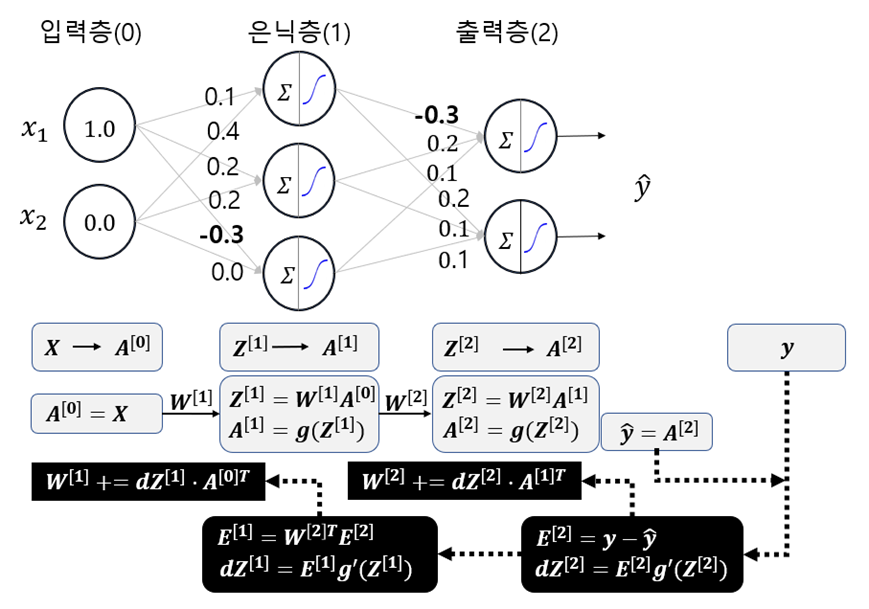

In [9]:
import numpy as np
g = lambda x : np.maximum(0, x) # relu
x = np.array([1, 0 ])
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]] )
z1 = np.dot(W1, x)
a1 = g(z1)
print(a1)

[0.1 0.2 0. ]


In [8]:

#g = lambda x : 1 / (1 + np.exp(-x))

g = lambda x : np.maximum(0, x)
x = np.array([ 1.0, 0.0])
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]])
W2 = np.array([[-0.3, 0.2, 0.1], [0.2, 0.1, 0.1]])
Z1 = np.dot(W1, x)
a1 = g(Z1)
z2 = np.dot(W2, a1)
a2 = g(z2)
print(a2)

[0.01 0.04]


지금까지 이 과제에서 다룬 신경망에서 출력한 예측값(출력) LateX:  \hat{y} 
�
&Hat;
과 레이블 LateX:  y[1, 1] 
�
[
1
,
1
]
에 따른 출력층의 오차 LateX:  E^{[2]} 
�
[
2
]
를 계산하고 역전파하여 은닉층의 오차 LateX:  E^{[1]} 
�
[
1
]
을 계산하십시오. 다음 보기에 가장 가까운 값을 선택하십시오. 먼저 손으로 계산하고, 그 다음 코딩하여 답을 확인해보십시오.

In [13]:
import numpy as np

#g = lambda x : 1 / (1 + np.exp(-x))

g = lambda x : np.maximum(0, x)
x = np.array([ 1.0, 0.0 ])
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [-0.3, 0.0]])
W2 = np.array([[-0.3, 0.2, 0.1], [0.2, 0.1, 0.1]])
z1 = np.dot(W1, x)
a1 = g(z1)
z2 = np.dot(W2, a1)
a2 = g(z2)
yhat = a2
# error backpropagation

y = np.array([1, 1])
E2 = y - yhat
E1 = np.dot(W2.T, E2)

print("z1: {}".format(z1))
print("a1: {}".format(a1))
print("z2: {}".format(z2))
print("yhat: {}".format(yhat))
print("E1: {}".format(E1))
print("E2: {}".format(E2))

z1: [ 0.1  0.2 -0.3]
a1: [0.1 0.2 0. ]
z2: [0.01 0.04]
yhat: [0.01 0.04]
E1: [-0.105  0.294  0.195]
E2: [0.99 0.96]


-------

## 학습 정리 
- 출력층으로부터 은닉층의 오차를 계산하기
- 복잡한 은닉층 오차 계산을 일반화 하기 

---------